In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.metrics import confusion_matrix

In [3]:
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
telecom = pd.read_csv("TelecomCustomerChurn.csv")

In [5]:
telecom.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [6]:
telecom.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
telecom.shape

(7043, 21)

In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telecom.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Pre Processing

In [10]:
telecom['TotalCharges'] = telecom["TotalCharges"].replace(" ", np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [11]:
# now for the nan values, we can get the TotalCharges by multiplying Tenure and MonthlyCharges

value = telecom['MonthlyCharges'] * telecom['Tenure']

In [12]:
# now we replace the nan with value using where function.

telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other=telecom['TotalCharges'])

In [13]:
telecom['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

## Exploratory Data Analysis

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

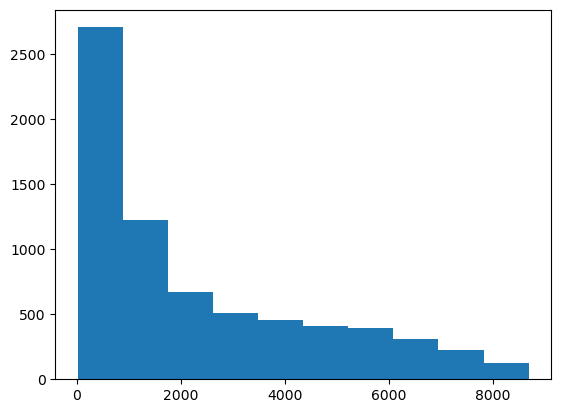

In [14]:
# distribution of total charges field

plt.hist(telecom['TotalCharges'])

### churn splits in terms of counts

<Axes: xlabel='Churn', ylabel='count'>

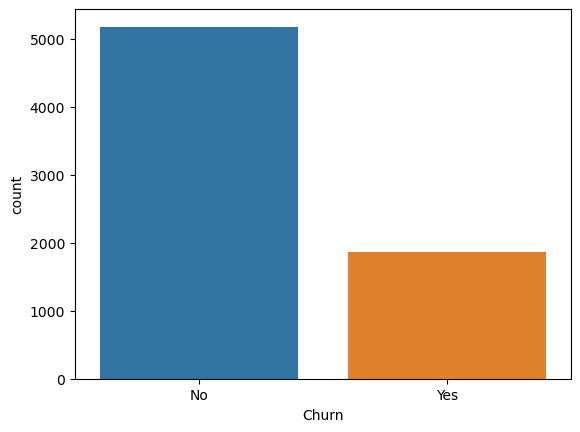

In [15]:
sns.countplot(x=telecom['Churn'])

### Tenure and Churn

<Axes: xlabel='Tenure', ylabel='Churn'>

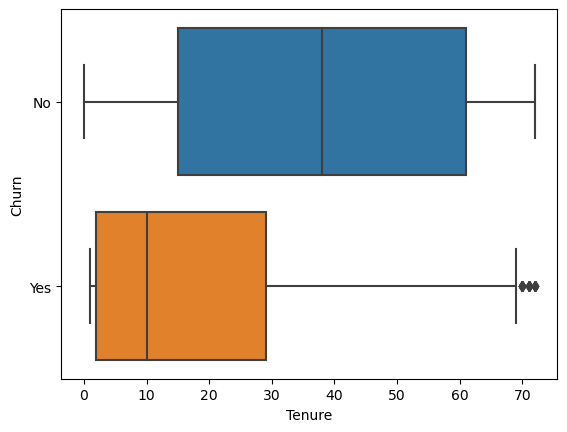

In [16]:
sns.boxplot(x='Tenure', y='Churn', data=telecom)

### For which kind of contract, churn probability is more?

In [17]:
telecom['Contract'].unique()

array(['Monthly', 'One year', 'Two year'], dtype=object)

array([<Axes: ylabel='count'>], dtype=object)

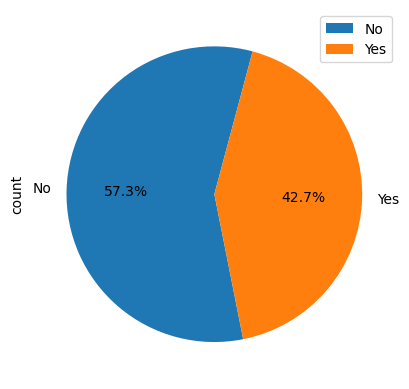

In [18]:
contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == 'Monthly']['Churn'].value_counts())
contract_m2m.plot.pie(subplots=True, labels = contract_m2m.index.values, autopct='%1.1f%%', startangle=75)

array([<Axes: ylabel='count'>], dtype=object)

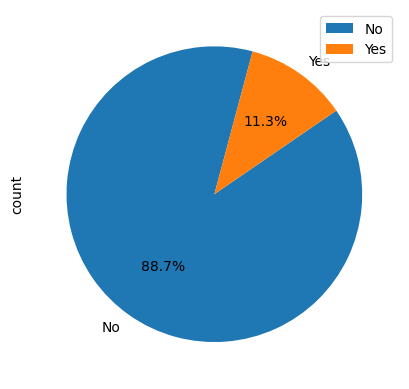

In [19]:
contract_1y = pd.DataFrame(telecom[telecom['Contract'] == 'One year']['Churn'].value_counts())
contract_1y.plot.pie(subplots=True, labels = contract_1y.index.values, autopct='%1.1f%%', startangle=75)

array([<Axes: ylabel='count'>], dtype=object)

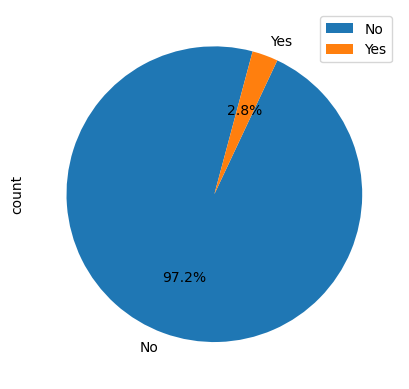

In [20]:
contract_2y = pd.DataFrame(telecom[telecom['Contract'] == 'Two year']['Churn'].value_counts())
contract_2y.plot.pie(subplots=True, labels = contract_2y.index.values, autopct='%1.1f%%', startangle=75)

### Whether monthly charges influence churn

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

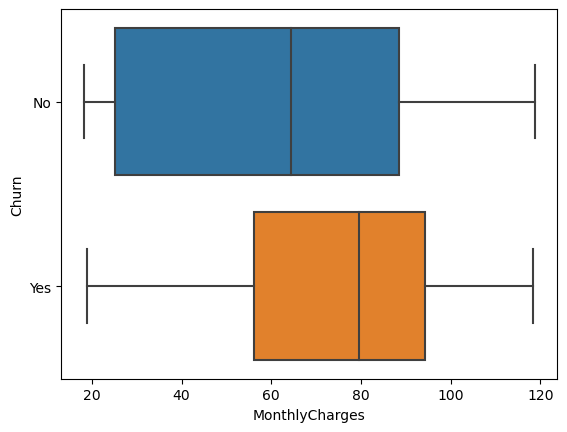

In [21]:
sns.boxplot(x='MonthlyCharges', y='Churn', data=telecom)

### Whether total charges influence churn

<Axes: xlabel='TotalCharges', ylabel='Churn'>

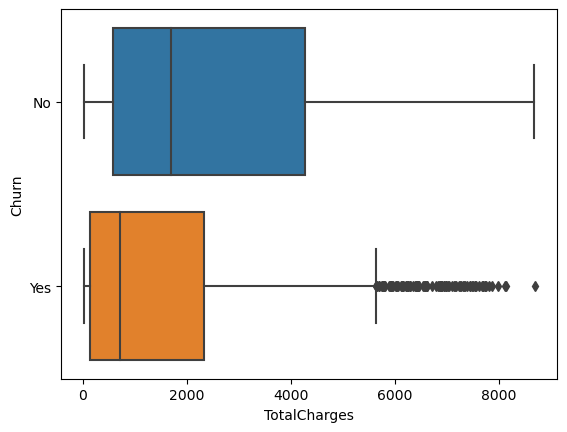

In [22]:
sns.boxplot(x='TotalCharges', y='Churn', data=telecom)

### Influence of type of internet connectivity

array([<Axes: ylabel='count'>], dtype=object)

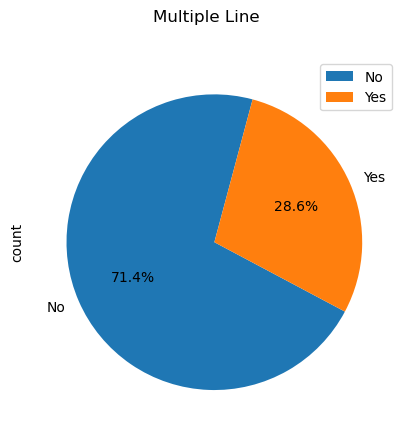

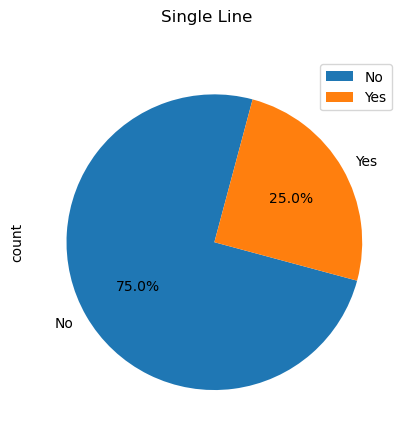

In [23]:
multi_line = pd.DataFrame(telecom[telecom['MultipleLines'] == 'Yes']['Churn'].value_counts())
multi_line.plot.pie(subplots=True, autopct='%1.1f%%', labels=multi_line.index.values, startangle=75, title='Multiple Line')

single_line = pd.DataFrame(telecom[telecom['MultipleLines'] == 'No']['Churn'].value_counts())
single_line.plot.pie(subplots=True, autopct='%1.1f%%', labels=single_line.index.values, startangle=75, title='Single Line')

### Influence of type of internet service

In [24]:
telecom['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

array([<Axes: ylabel='count'>], dtype=object)

<Figure size 1500x500 with 0 Axes>

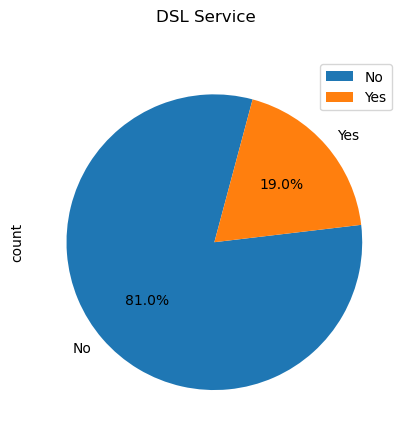

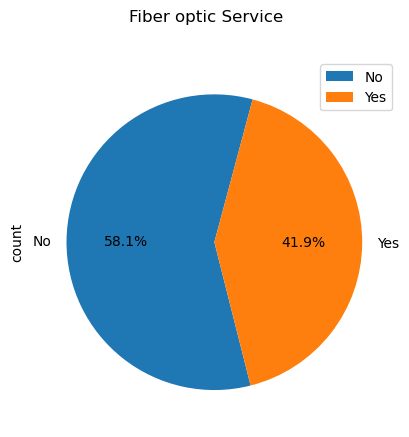

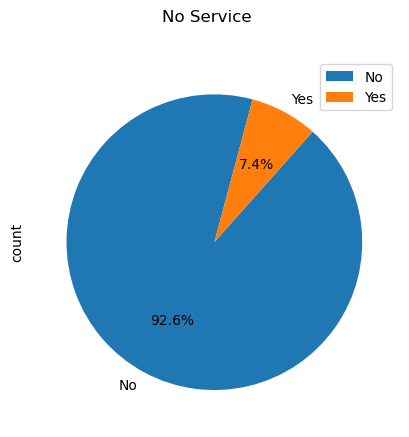

In [25]:
plt.figure(figsize=(15,5))

dsl = pd.DataFrame(telecom[telecom['InternetService'] == 'DSL']['Churn'].value_counts())
dsl.plot.pie(subplots=True, autopct='%1.1f%%', labels=dsl.index.values, startangle=75, title='DSL Service')

fibre_optic = pd.DataFrame(telecom[telecom['InternetService'] == 'Fiber optic']['Churn'].value_counts())
fibre_optic.plot.pie(subplots=True, autopct='%1.1f%%', labels=fibre_optic.index.values, startangle=75, title='Fiber optic Service')

no_internet = pd.DataFrame(telecom[telecom['InternetService'] == 'No']['Churn'].value_counts())
no_internet.plot.pie(subplots=True, autopct='%1.1f%%', labels=no_internet.index.values, startangle=75, title='No Service')

# Pre Processing

### Convert Yes/No into binary

In [26]:
def binary_convert(x):
    return x.map({"Yes":1, "No":0})

varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

telecom[varlist] = telecom[varlist].apply(binary_convert)

In [27]:
telecom.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No,DSL,No,...,No,No,No,No,Monthly,1,Manual,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Manual,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Monthly,1,Manual,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Monthly,1,Manual,70.70,151.65,1


#### Getting dummy variables

In [28]:
dm_var = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'Gender', 'InternetService', 'MultipleLines', 'OnlineSecurity',
                                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], 
                        drop_first=True, dtype='int64')

telecom = pd.concat([telecom, dm_var], axis=1)
telecom.drop(['Contract', 'PaymentMethod', 'Gender', 'InternetService', 'MultipleLines', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

In [29]:
telecom

,customerID,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,1,0,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,0,1,1,0,1,1,1,1
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,1,0,1,1,0,1,1
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,1,0,0,0,0,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,1,...,1,1,0,1,0,0,0,0,0,0


In [30]:
telecom.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Manual',
       'Gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [31]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   Tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   int64  
 11  Cont

In [32]:
# null values handling

telecom.dropna(inplace=True)
telecom.isna().sum().sum()

0

# Model Building

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
telecom[numeric_cols] = scaler.fit_transform(telecom[numeric_cols])

### train_test split

In [34]:
from sklearn.model_selection import train_test_split

# putting feature variable to X and target variable to y
X = telecom.drop('customerID', axis=1)
y = X.pop('Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [35]:
X_train.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,Gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0,0,0,0.023559,1,1,-0.337331,-0.272698,0,0,...,1,0,0,1,0,1,0,0,0,0
5790,0,1,1,0.308766,0,1,-0.463645,-0.108863,0,0,...,0,0,0,0,0,1,0,0,1,1
6498,0,0,0,-1.280248,1,1,0.581767,-0.971054,0,0,...,0,1,0,0,0,1,1,0,0,0
880,0,0,0,-0.913552,1,1,1.505852,-0.547073,0,0,...,1,1,0,0,1,1,1,1,1,1
2784,0,0,1,-1.158016,1,1,1.106966,-0.832521,0,0,...,0,1,0,0,0,0,1,1,1,1


## Correlation

In [36]:
cor = telecom.corr(numeric_only=True)
cor

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,...,Gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,-0.046491,...,-0.001819,0.254923,-0.182519,0.142996,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,0.083067,...,-0.001379,0.001235,-0.000286,0.142561,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,0.069222,...,0.010349,-0.164101,0.138383,-0.024307,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375
Tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.202338,...,0.005285,0.017930,-0.037529,0.332399,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,-0.003142,...,-0.007515,0.290183,0.171817,0.279530,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477
PaperlessBilling,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,-0.052278,...,-0.011902,0.326470,-0.320592,0.163746,-0.004051,0.127056,0.104079,0.037536,0.224241,0.211583
MonthlyCharges,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,0.004810,...,-0.013779,0.787195,-0.763191,0.490912,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235
TotalCharges,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.170569,...,0.000048,0.360769,-0.374878,0.469042,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867
Churn,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,-0.178225,...,-0.008545,0.307463,-0.227578,0.040033,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860
Contract_One year,-0.046491,0.083067,0.069222,0.202338,-0.003142,-0.052278,0.004810,0.170569,-0.178225,1.000000,...,0.007755,-0.076809,0.038061,-0.003594,0.100658,0.084113,0.102911,0.096258,0.061930,0.064780


### Fields with high correlation, greater than 0.7

In [38]:
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
         if abs(cor.iloc[i,j]) > 0.7:
             colname1 = cor.columns[i]
             colname2 = cor.columns[j]
             print(abs(cor.iloc[i,j]), "--", i, "--", j, "--", colname1, "--", colname2)
             correlated_features.add(colname1)
             correlated_features.add(colname2)
            
correlated_features = list(correlated_features)

0.8258804609332 -- 7 -- 3 -- TotalCharges -- Tenure
0.7871948529419375 -- 14 -- 6 -- InternetService_Fiber optic -- MonthlyCharges
0.7631910615169525 -- 15 -- 6 -- InternetService_No -- MonthlyCharges


In [39]:
correlated_features

['TotalCharges',
 'Tenure',
 'InternetService_No',
 'MonthlyCharges',
 'InternetService_Fiber optic']

##### dropping highly correlated features

In [40]:
X_test.drop(correlated_features, axis=1, inplace=True)
X_train.drop(correlated_features, axis=1, inplace=True)

##### correlation heatmap

<Axes: >

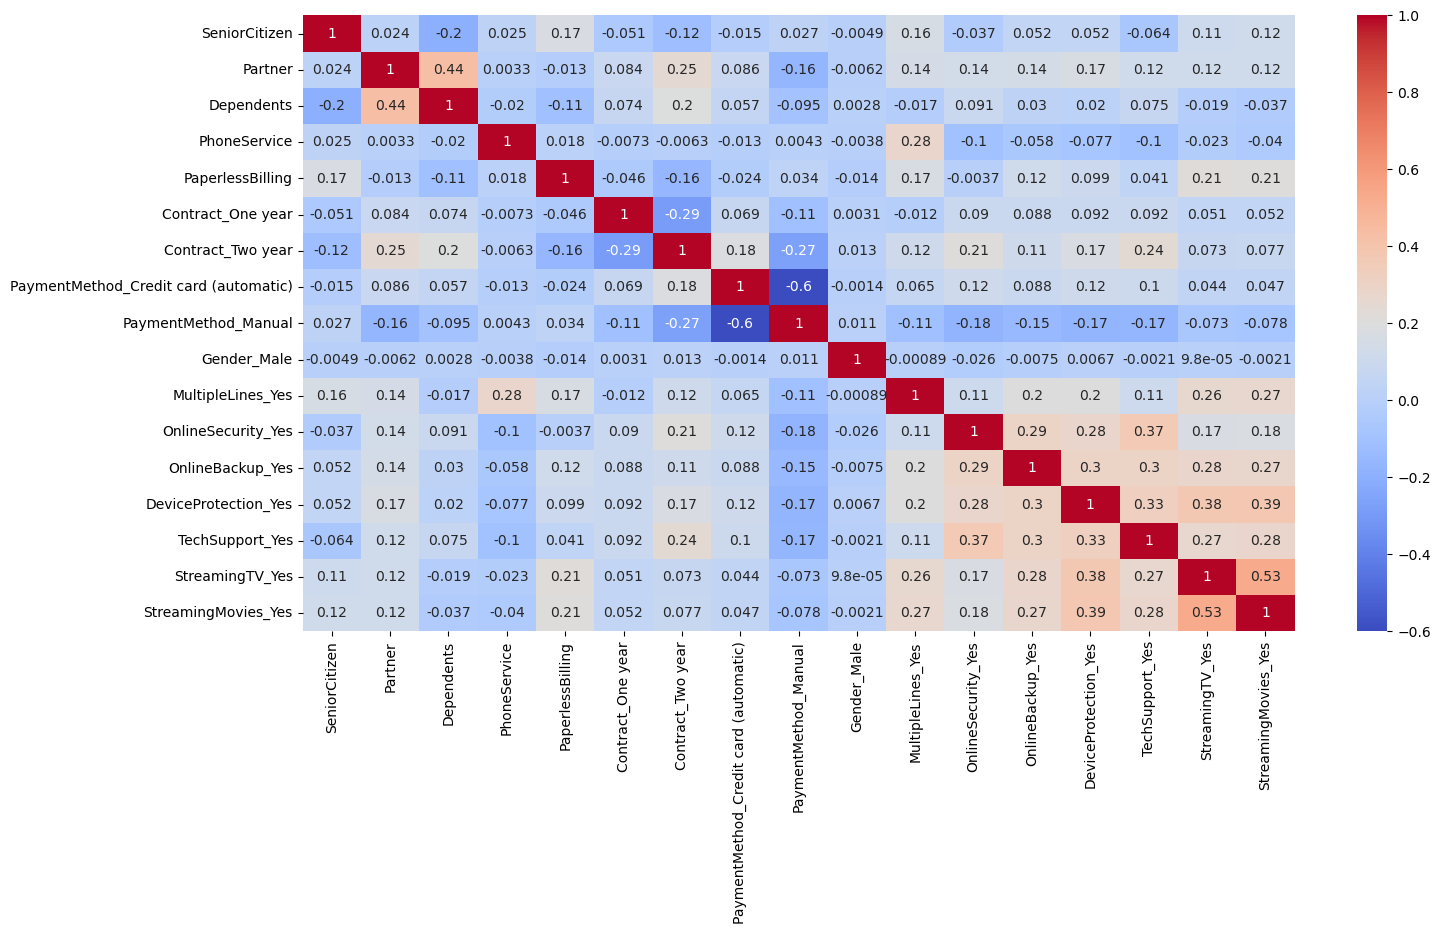

In [43]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')

# Model Building

In [44]:
from statsmodels.tools import add_constant as add_constant

X_train_constant = add_constant(X_train)
X_train_constant.head()

,const,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Manual,Gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0
5790,1.0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1
6498,1.0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0
880,1.0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1
2784,1.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1


### Logit Model

In [46]:
cols = X_train_constant.columns
model = sm.Logit(y_train, X_train_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.445957
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4904
Method:                           MLE   Df Model:                           17
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.2239
Time:                        17:47:51   Log-Likelihood:                -2195.0
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                7.705e-259
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9878      0.176     -5.606      0.000      -1.333      -0.642
SeniorCitizen                             0.4678      0.096      4.898      0.000       0.281       0.655
Partner                                  -0.1693      0.087     -1.957      0.050      -0.339       0.000
Dependents                               -0.2445      0.102     -2.403      0.016      -0.444      -0.045
PhoneService                              0.0378      0.137      0.276      0.783      -0.231       0.307
PaperlessBilling                          0.5389      0.084      6.429      0.000       0.375       0.703
Contract_One year                        -1.5589      0.114    -13.651      0.000      -1.783      -1.335
Contract_Two year                        -2.7295      0.187    -14.584      0.000      -3.096      -2.363
PaymentMethod_Credit card (automatic)    -0.2339      0.132     -1.769      0.077      -0.493       0.025
PaymentMethod_Manual                      0.2630      0.103      2.559      0.011       0.062       0.464
Gender_Male                              -0.0690      0.074     -0.930      0.352      -0.215       0.076
MultipleLines_Yes                         0.2034      0.085      2.397      0.017       0.037       0.370
OnlineSecurity_Yes                       -0.4088      0.098     -4.172      0.000      -0.601      -0.217
OnlineBackup_Yes                         -0.2205      0.086     -2.551      0.011      -0.390      -0.051
DeviceProtection_Yes                      0.0273      0.091      0.300      0.764      -0.151       0.205
TechSupport_Yes                          -0.3959      0.098     -4.029      0.000      -0.589      -0.203
StreamingTV_Yes                           0.4598      0.090      5.098      0.000       0.283       0.637
StreamingMovies_Yes                       0.3300      0.090      3.668      0.000       0.154       0.506
=========================================================================================================
"""

##### dropping columns and then training the model once again.

In [47]:
drop_cols = ['PhoneService', 'PaymentMethod_Credit card (automatic)', 'Gender_Male', 'DeviceProtection_Yes']

X_train_constant.drop(drop_cols, axis=1, inplace=True)

##### model creation

In [48]:
model = sm.Logit(y_train, X_train_constant)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.446383
         Iterations 8


In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4908
Method:                           MLE   Df Model:                           13
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.2231
Time:                        17:58:45   Log-Likelihood:                -2197.1
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                7.438e-262
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0966      0.103    -10.622      0.000      -1.299      -0.894
SeniorCitizen            0.4670      0.095      4.894      0.000       0.280       0.654
Partner                 -0.1632      0.086     -1.895      0.058      -0.332       0.006
Dependents              -0.2463      0.102     -2.425      0.015      -0.445      -0.047
PaperlessBilling         0.5362      0.084      6.404      0.000       0.372       0.700
Contract_One year       -1.5571      0.114    -13.696      0.000      -1.780      -1.334
Contract_Two year       -2.7309      0.187    -14.621      0.000      -3.097      -2.365
PaymentMethod_Manual     0.3714      0.082      4.520      0.000       0.210       0.532
MultipleLines_Yes        0.2119      0.081      2.613      0.009       0.053       0.371
OnlineSecurity_Yes      -0.4057      0.098     -4.152      0.000      -0.597      -0.214
OnlineBackup_Yes        -0.2197      0.086     -2.552      0.011      -0.388      -0.051
TechSupport_Yes         -0.3922      0.098     -4.015      0.000      -0.584      -0.201
StreamingTV_Yes          0.4649      0.089      5.225      0.000       0.291       0.639
StreamingMovies_Yes      0.3311      0.089      3.723      0.000       0.157       0.505
========================================================================================
"""